# Social Skills and Math Skills

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


I had to tutor a lot of people in mathematical or statistical part of economics and in programming. And a lot of times (though far from always), there were these moment, when I could see that people were not getting it, but I was not sure why. 

I remeber a case in my master studies, where one of my classmates from abroad had problems, and wanted my help. So I said yes. Well, the problem was, that I eventually found out, that he did not even uderstand some of the basic mathematical principles. Like using the letters to stand for the numbers and linear regression. How does one explains this? I don't know, because to be, it was clear from the start. 

It was only when I started tutoring in the programming, that I was able to formulate some hypotesis. One interesting things, that I had seen, with the people I was tutoring, was the use of the theory of mind. At least some of their problems steamed from their expectation, that the computer has a theory of mind and that this is a conversations. 

I mean, it is, but it is a lot more structured. It is a conversation, where everything has to be explicitly said or was at one point explicitly agreed on, and these agreements can be checked. There is no reading the intention going one. 

Maybe this is the reason, why some people are afraid of the code? Because the code/computer might take offense?

So, my hypotesis was, that this social understanding would impeed the ability to do math and code. 

I found the article titled [The Empathizing-Systemizing Theory, Social Abilities, and Mathematical Achievement in Children](https://doi.org/10.1038/srep23011), that used the systemizing-empthatizing to try and research this, in out case, the empthazing would be connected to the empathy/social skills and so on. The people lower on empthaizing were better at math (calculating at this level). Systemizing was not connected in this stage. 

But by the time people come to the university, systemizing was conneted to math intelligence, as discivered in article [Systemisers are better at maths](https://doi.org/10.1038/s41598-018-30013-8). Subject and gender differences in math dissapread when controled for systemizing.

This is as far as ability goes. In the article [Testing the Empathizing–Systemizing theory of sex differences and the Extreme Male Brain theory of autism in half a million people](https://doi.org/10.1073/pnas.1811032115), one of the analysis that they did was the difference in systemizing and empathizing between STEM and non-STEM employees. The STEM employes were lower in empthaizing (beta = -1.10) and higher in systemizing (beta = +1.27).

Now, if anybody is interested in the short, but very readable analysis of gender differences in STEM, I suggest the report [Why don’t more girls choose to pursue a science career?](https://www.oecd-ilibrary.org/content/paper/02bd2b68-en)

So, as far as the literature goes, there is some indication, that mathematical interest or skill could be connected to social skills. 



So in order to get one more piece of the information, I will try to find some data and do analysis in this direction as well. 

## Country Level Analysis of Agreeablness and PISA Mathematical Scores

While the effect on the country levels can be different than the effects on the individual levels, it can still be useful to check it. Expecially, since a lot more country-level data is already avalable.

First I combined two dataset. The personality came for the article The Geographic Distribution of the Big Five Personality Traits: Patterns and Profiles of Human Self-Description Across 56 Nations, which can be found here: https://www.toddkshackelford.com/downloads/Schmitt-JCCP-2007.pdf . And the mathematical data came for the 2015 PISA results, that can be found here: http://pisadataexplorer.oecd.org . I combined the dataset, so it only included the countries, that were represented in both (40 countries).

In [2]:
data_country = read.csv("data-personality-math.csv")

In [3]:
head(data_country)

Country,Math,E,A,C,N,O
Argentina,409,49.10,42.75,48.18,55.05,50.83
Australia,494,48.98,47.51,45.87,50.82,50.07
Austria,497,50.61,45.90,46.73,49.69,49.29
Belgium,507,45.99,45.07,43.03,53.60,54.59
Brazil,377,45.89,45.86,45.38,53.14,49.16
Canada,516,48.32,49.14,49.05,50.58,48.75


Now, the social skills (that I am interested in) is most connected to agreeablness. So this is what I am going to be using for this analysis. 

Let us first see the distribution of the two variables, that will be used.

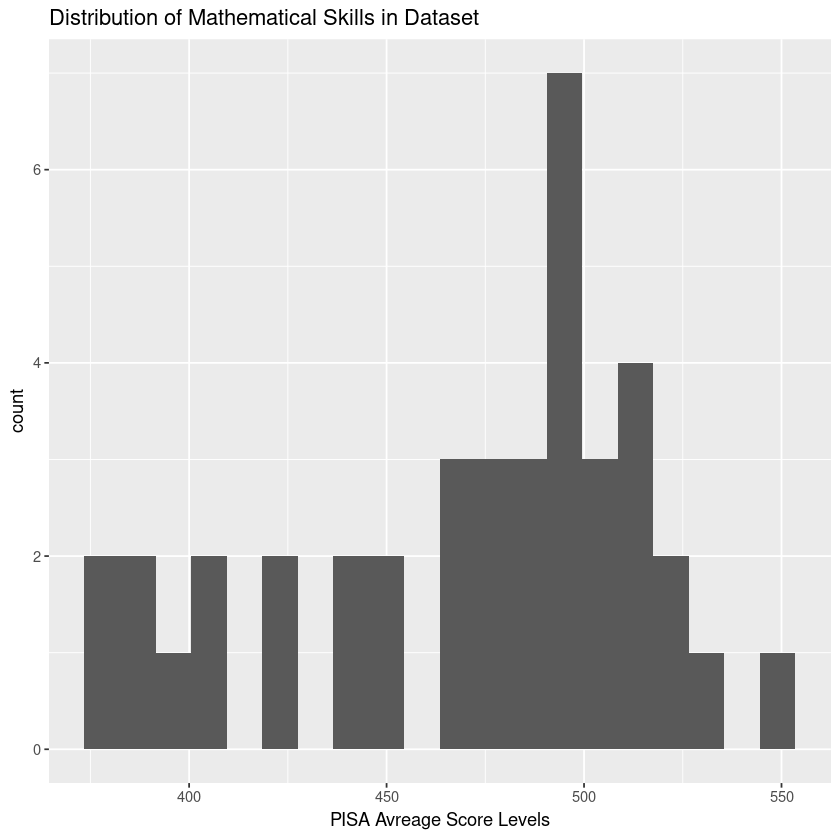

In [4]:
ggplot(data_country, aes(x=Math)) + 
       geom_histogram(bins=20) +
       xlab("PISA Avreage Score Levels") + 
       ggtitle("Distribution of Mathematical Skills in Dataset")

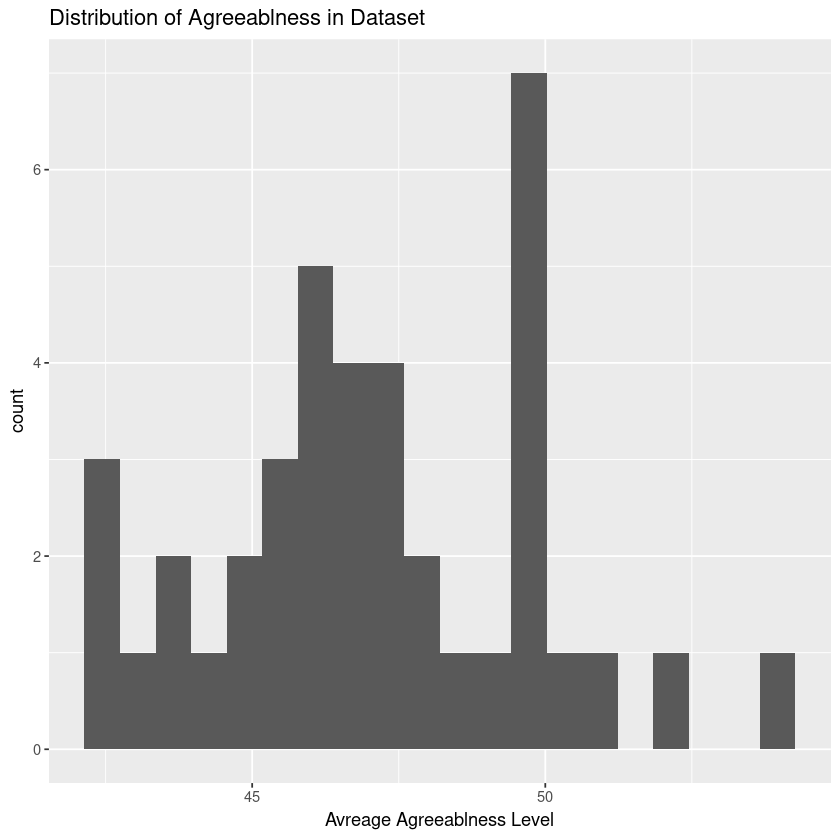

In [5]:
ggplot(data_country, aes(x=A)) + 
       geom_histogram(bins=20) +
       xlab("Avreage Agreeablness Level") + 
       ggtitle("Distribution of Agreeablness in Dataset")

And now for the connection.

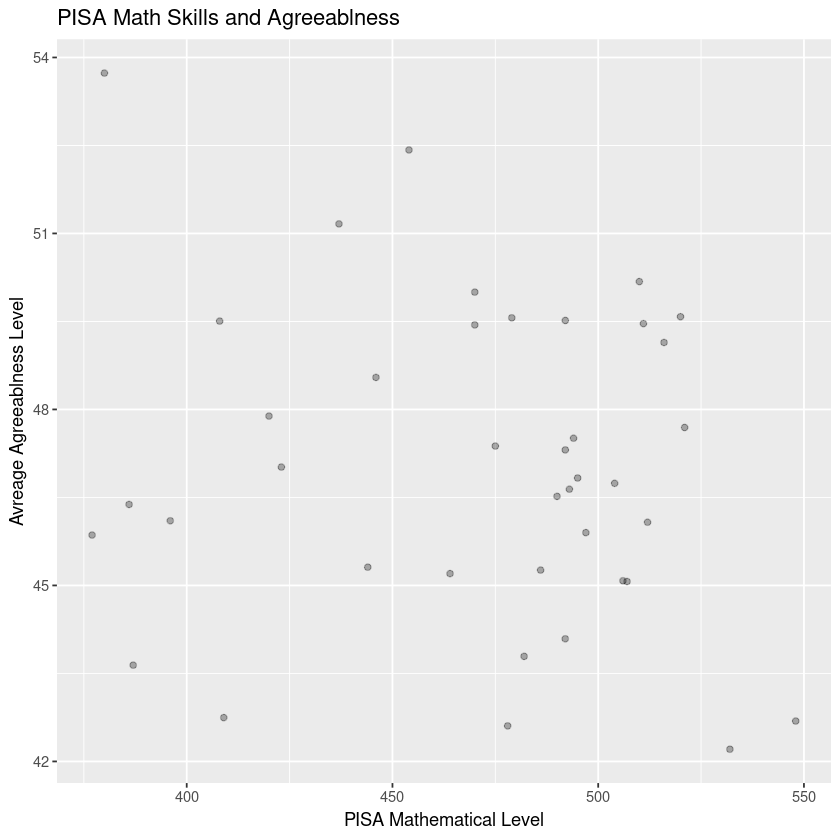

In [6]:
ggplot(data_country, aes(x=Math, y=A)) + 
       geom_jitter(width=0.01, alpha=0.3) +
       ylab("Avreage Agreeablness Level") + 
       xlab("PISA Mathematical Level") + 
       ggtitle("PISA Math Skills and Agreeablness")

PISA results are standardized to 500 mean and 100 standard deviation over all the countries. The personality took US as standard and had all the countries standardized with US having the mean of 50 and standard deviation of 10. Since the scaling can be potential problem in statistical analysis, I will devide PISA scores with 10. This way, that will both be standardized on the similar scale (but not the same). 

In [7]:
data_country$Math <- data_country$Math/10

In [8]:
head(data_country)

Country,Math,E,A,C,N,O
Argentina,40.9,49.10,42.75,48.18,55.05,50.83
Australia,49.4,48.98,47.51,45.87,50.82,50.07
Austria,49.7,50.61,45.90,46.73,49.69,49.29
Belgium,50.7,45.99,45.07,43.03,53.60,54.59
Brazil,37.7,45.89,45.86,45.38,53.14,49.16
Canada,51.6,48.32,49.14,49.05,50.58,48.75


Now, I will build a linear regression model, where I will try to predict mathematical scores from agreeablness.

In [9]:
model_country = lm(data_country$Math ~ data_country$A)

While the coeficient is -0.24 (so in the direction, that I would predict), I did not have a high enough sample to make it statistically significant. So this might just be a chance of random fluctuation.

In [10]:
summary(model_country)


Call:
lm(formula = data_country$Math ~ data_country$A)

Residuals:
   Min     1Q Median     3Q    Max 
-9.595 -2.489  1.317  3.140  6.736 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     58.4208    12.7601   4.578 4.91e-05 ***
data_country$A  -0.2426     0.2708  -0.896    0.376    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.596 on 38 degrees of freedom
Multiple R-squared:  0.02069,	Adjusted R-squared:  -0.005086 
F-statistic: 0.8026 on 1 and 38 DF,  p-value: 0.3759


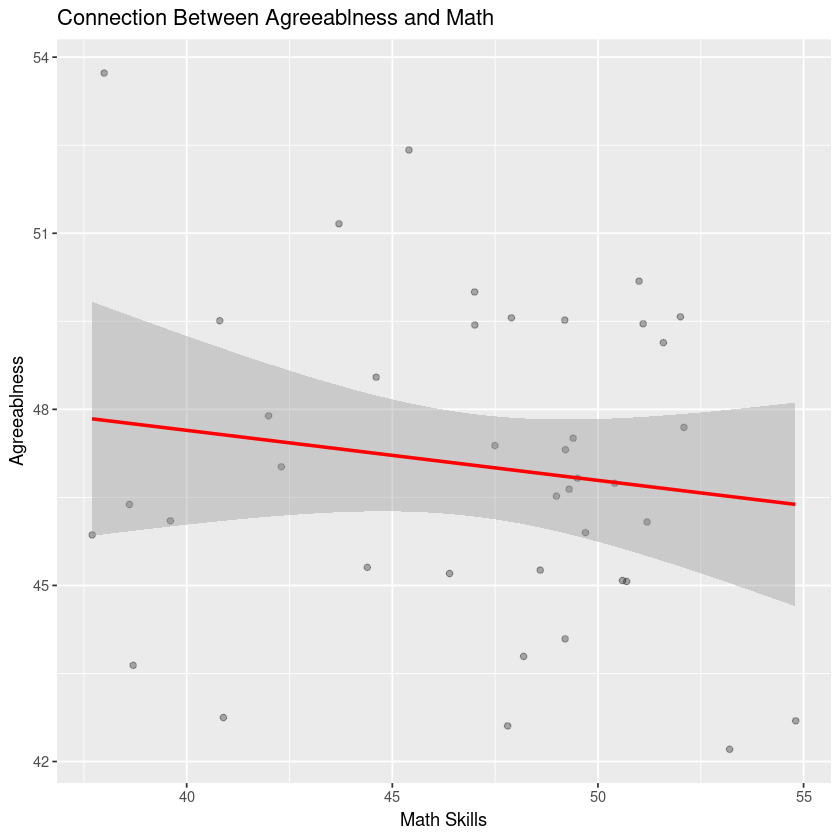

In [11]:
ggplot(data_country, aes(x=Math, y=A)) + 
       geom_jitter(width=0.01, alpha=0.3) +
       geom_smooth(method=lm, color="red") + 
       ylab("Agreeablness") + 
       xlab("Math Skills") + 
       ggtitle("Connection Between Agreeablness and Math")

Just for my own interest, I want to see, which one would have the highest effect amoung personalty dimentions. I will again use linear regression.

In [12]:
model_country_5 = lm(data_country$Math ~ data_country$A + data_country$C + data_country$O + data_country$E + data_country$N)

In [13]:
summary(model_country_5)


Call:
lm(formula = data_country$Math ~ data_country$A + data_country$C + 
    data_country$O + data_country$E + data_country$N)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.053  -2.184   1.636   2.686   5.458 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    151.4562    54.6188   2.773  0.00895 **
data_country$A  -0.0740     0.3350  -0.221  0.82649   
data_country$C  -0.5721     0.3204  -1.786  0.08306 . 
data_country$O  -0.3000     0.2818  -1.065  0.29452   
data_country$E  -0.4551     0.6164  -0.738  0.46542   
data_country$N  -0.7286     0.4199  -1.735  0.09177 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.42 on 34 degrees of freedom
Multiple R-squared:  0.1896,	Adjusted R-squared:  0.07048 
F-statistic: 1.591 on 5 and 34 DF,  p-value: 0.189


It seems, that when all the personality dimentions are added in, the agreeablness have the least affect. Instread it seems that neuroticism and maybe openess are much more interesting in this regard.